In [1]:
import sys
import os

In [2]:
module_path = os.path.abspath(os.path.join('src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from loader import load_images_with_labels

data_dir = "data/raw/"

images, labels, label_index_map = load_images_with_labels(data_dir)

print(f"Loaded {len(images)} images.")
print(f"Labels: {labels}")
print(f"Label mapping: {label_index_map}")

Loaded 360 images.
Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
Label mapping: {'apple': 0, 'banana': 1, 'cherry': 2, 'chickoo': 3, 'grapes': 4, 'kiwi': 5, 'mango': 6, 'orange': 7, 'strawberry': 8}


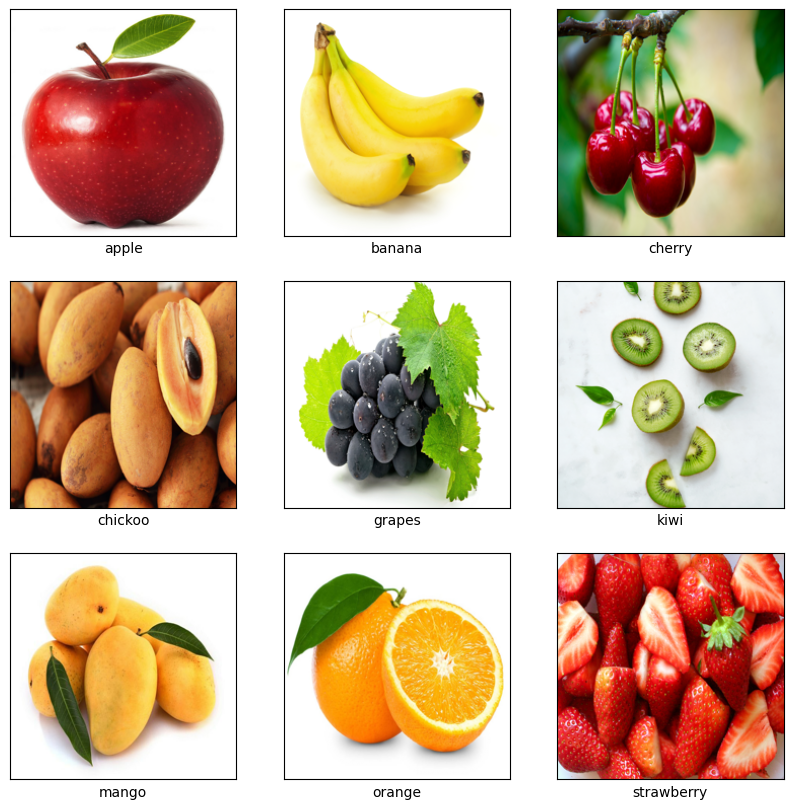

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Show randam images with a step size of 30 to check if mappings are correct
def show_sample_images(images, labels, label_index_map):
    plt.figure(figsize=(10, 10))
    step = (len(images))//9
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i * step])
        label_index = labels[i*step]
        label_name = list(label_index_map.keys())[list(label_index_map.values()).index(label_index)]
        plt.xlabel(label_name)
    plt.show()

show_sample_images(images, labels, label_index_map)


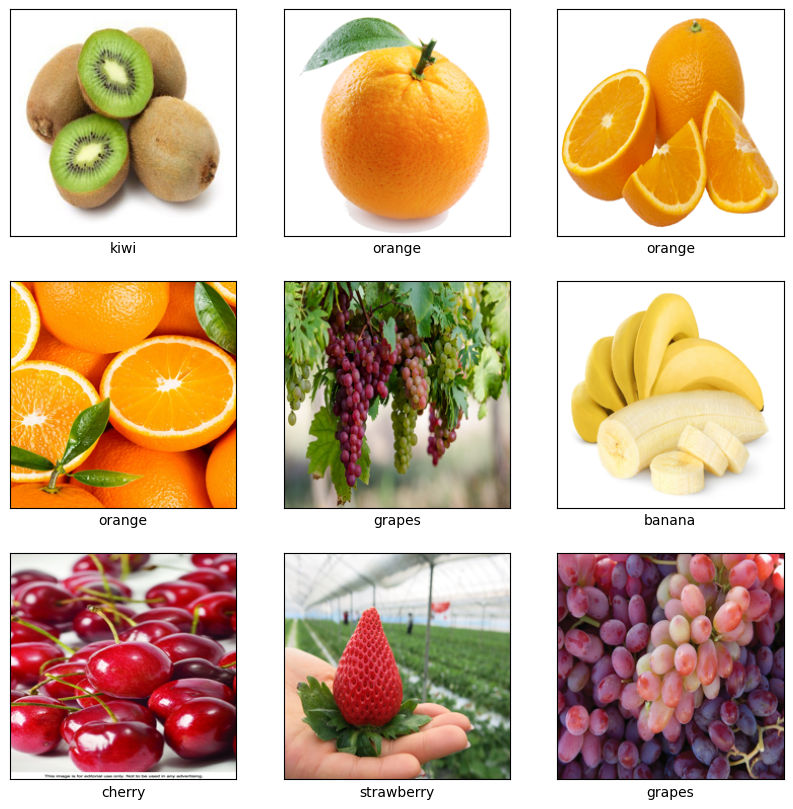

In [5]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=69)

show_sample_images(train_images, train_labels, label_index_map)

In [6]:
import tensorflow as tf

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=len(label_index_map))
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=len(label_index_map))

In [7]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

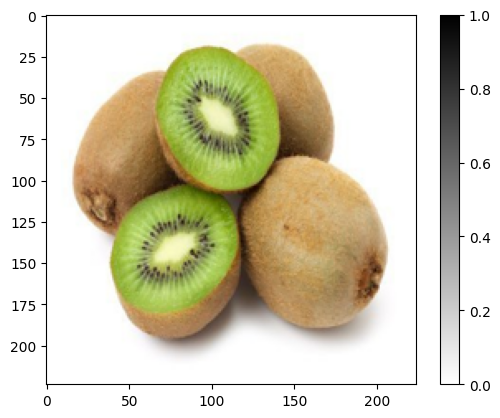

In [8]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

In [10]:
import tensorflow as tf

def build_model(input_shape, num_classes):
    """
    Builds a CNN model using Keras.
    
    :param input_shape: Shape of the input images (height, width, channels), e.g., (224, 224, 3).
    :param num_classes: Number of output classes (e.g., the number of fruit categories).
    :return: A compiled Keras model.
    """
    model = tf.keras.Sequential([
        # First convolutional layer
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second convolutional layer
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Third convolutional layer
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Flatten the feature maps
        tf.keras.layers.Flatten(),

        # Fully connected layer
        tf.keras.layers.Dense(128, activation='relu'),

        # Output layer (softmax activation for multi-class classification)
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model with Adam optimizer and categorical crossentropy loss
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [11]:
input_shape = (224, 224, 3)
model = build_model(input_shape, len(label_index_map))

# Train the model
history = model.fit(train_images, train_labels, 
                    epochs=10,  # You can increase the number of epochs to improve performance
                    batch_size=32,  # Adjust based on your memory capacity
                    validation_data=(test_images, test_labels))  # Include validation to monitor test accuracy

Epoch 1/10


C:\Users\antho\Coding\repos\fruit-classifier\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 552ms/step - accuracy: 0.1506 - loss: 3.7966 - val_accuracy: 0.2222 - val_loss: 1.9706
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 550ms/step - accuracy: 0.3400 - loss: 1.7615 - val_accuracy: 0.3333 - val_loss: 1.7841
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 593ms/step - accuracy: 0.4477 - loss: 1.4173 - val_accuracy: 0.3611 - val_loss: 1.7513
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.6340 - loss: 1.0447 - val_accuracy: 0.3889 - val_loss: 2.2241
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 526ms/step - accuracy: 0.7355 - loss: 0.7566 - val_accuracy: 0.4306 - val_loss: 1.9383
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step - accuracy: 0.8387 - loss: 0.5656 - val_accuracy: 0.4444 - val_loss: 2.0639
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 527ms/step - accuracy: 0.9223 - loss: 0.2675 - val_accuracy: 0.4722 - val_loss: 2.5059
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 538ms/step - accuracy: 0.9637 - loss: 0.1974 - val_accuracy: 0.4167 - val_loss: 2.5599
Epo

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4271 - loss: 2.6721
Test accuracy: 0.4166666567325592


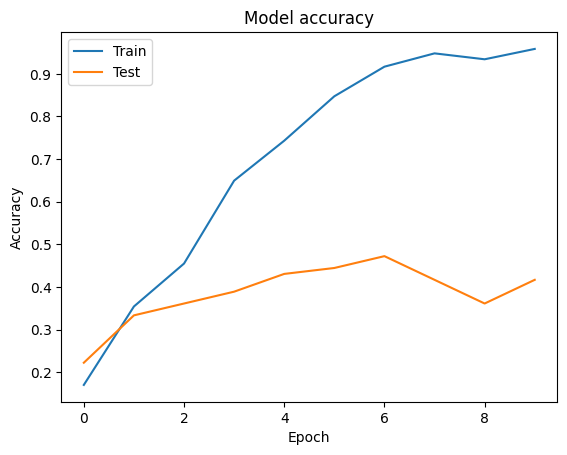

In [26]:

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

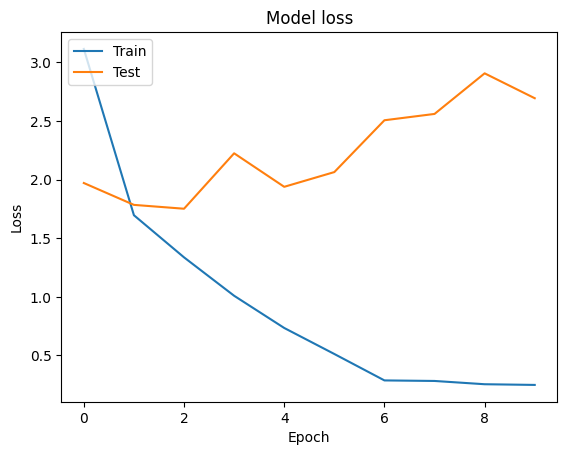

In [28]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
def build_improved_model(input_shape, num_classes):
    """
    Builds a more complex CNN model for better feature extraction.
    """
    model = tf.keras.Sequential([
        # First convolutional block
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        # Second convolutional block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        # Third convolutional block
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        # Fourth convolutional block
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        
        # Flatten and Dense layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout for regularization
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [32]:
input_shape = (224, 224, 3)
model = build_improved_model(input_shape, len(label_index_map))

# Train the model
history_improved_model = model.fit(train_images, train_labels, 
                    epochs=10,  # You can increase the number of epochs to improve performance
                    batch_size=32,  # Adjust based on your memory capacity
                    validation_data=(test_images, test_labels))  # Include validation to monitor test accuracy

C:\Users\antho\Coding\repos\fruit-classifier\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.1021 - loss: 2.2392 - val_accuracy: 0.0417 - val_loss: 2.2115
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2394 - loss: 2.1123 - val_accuracy: 0.2639 - val_loss: 2.0226
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3842 - loss: 1.8437 - val_accuracy: 0.3611 - val_loss: 1.7462
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4721 - loss: 1.4606 - val_accuracy: 0.4028 - val_loss: 1.6426
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4781 - loss: 1.3656 - val_accuracy: 0.4028 - val_loss: 1.5701
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5796 - loss: 1.1635 - val_accuracy: 0.4306 - val_loss: 1.5340
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5648 - loss: 1.1428 - val_accuracy: 0.4306 - val_loss: 1.6332
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5548 - loss: 1.1428 - val_accuracy: 0.3750 - val_loss: 1.5666
Epoch 9/

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.3928 - loss: 1.6772
Test accuracy: 0.4027777910232544
